<a href="https://colab.research.google.com/github/Saarangagarwal/swt_bench_analysis/blob/master/swt_bench_issue_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Step 3: Load the parquet file into a DataFrame
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_verified_zsb.parquet"
df = pd.read_parquet(file_path)

# Step 4: Clean the instance_id column
# Remove everything after the last '-'
df['instance_id_clean'] = df['instance_id'].str.rsplit('-', n=1).str[0]

# Step 5: Group by cleaned instance_id and count
instance_counts = (
    df.groupby('instance_id_clean')
      .size()
      .reset_index(name='count')
)

instance_counts = instance_counts.sort_values(by='count', ascending=False)

instance_counts

,instance_id_clean,count
1,django__django,216
11,sympy__sympy,73
2,matplotlib__matplotlib,32
10,sphinx-doc__sphinx,28
9,scikit-learn__scikit-learn,24
0,astropy__astropy,17
8,pytest-dev__pytest,15
6,pydata__xarray,15
7,pylint-dev__pylint,6
5,psf__requests,4




---



---



---



---



---



In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb5.xlsx"
df = pd.read_excel(file_path, sheet_name="swt_bench_verified_modeling")


In [ ]:
# # Custom order of instance_ids
# custom_order = [
#     "django__django",
#     "sympy__sympy",
#     "scikit-learn__scikit-learn",
#     "matplotlib__matplotlib",
#     "sphinx-doc__sphinx",
#     "pytest-dev__pytest",
#     "astropy__astropy",
#     "pylint-dev__pylint",
#     "pydata__xarray",
#     "mwaskom__seaborn",
#     "pallets__flask",
#     "psf__requests"
# ]

# def yes_no_counts_per_instance(df, col_index, order=None):
#     """
#     Count 'yes' and 'no' (case-insensitive) for a given column index per base instance_id,
#     optionally ordering instance_ids according to a given list.

#     Parameters:
#     - df: pandas DataFrame
#     - col_index: integer, 0-based index of the column to analyze
#     - order: list of instance_ids specifying the order

#     Returns:
#     - pandas DataFrame with yes/no counts per instance_id
#     """
#     # Extract base instance_id
#     df['base_instance_id'] = df.iloc[:, 0].astype(str).str.rsplit("-", n=1).str[0]

#     # Group by base_instance_id and count yes/no
#     result = df.groupby('base_instance_id').apply(
#         lambda g: pd.Series({
#             'yes_count': (g.iloc[:, col_index].astype(str).str.lower() == 'yes').sum(),
#             'no_count': (g.iloc[:, col_index].astype(str).str.lower() == 'no').sum()
#         })
#     )

#     # Reorder according to provided list
#     if order is not None:
#         result = result.reindex(order)

#     return result

# # Example usage for column 3 (0-based index = 2)
# ordered_counts = yes_no_counts_per_instance(df, 2, order=custom_order)
# print(ordered_counts)

# Custom order of instance_ids
custom_order = [
    "django__django",
    "sympy__sympy",
    "scikit-learn__scikit-learn",
    "matplotlib__matplotlib",
    "sphinx-doc__sphinx",
    "pytest-dev__pytest",
    "astropy__astropy",
    "pylint-dev__pylint",
    "pydata__xarray",
    "mwaskom__seaborn",
    "pallets__flask",
    "psf__requests"
]

def yes_no_counts_per_instance_compact(df, col_index, order=None):
    """
    Count 'yes' and 'no' for a column and return as "yes_count | no_count",
    optionally ordering by a custom list.
    """
    # Extract base instance_id
    df['base_instance_id'] = df.iloc[:, 0].astype(str).str.rsplit("-", n=1).str[0]

    # Compute yes/no counts per instance_id
    result = df.groupby('base_instance_id').apply(
        lambda g: f"{(g.iloc[:, col_index].astype(str).str.lower() == 'yes').sum()} | "
                  f"{(g.iloc[:, col_index].astype(str).str.lower() == 'no').sum()}"
    )

    # Reorder according to custom order if provided
    if order is not None:
        result = result.reindex(order)

    # Only return the counts as a list (no instance_id)
    return result.tolist()

# Example usage for column 3 (0-based index = 2)
compact_counts = yes_no_counts_per_instance_compact(df, 7, order=custom_order)

# Print in compact form
for count in compact_counts:
    print(count)

22 | 194
3 | 70
1 | 23
2 | 30
1 | 27
0 | 15
1 | 16
0 | 6
2 | 13
0 | 2
0 | 1
0 | 4


/tmp/ipython-input-3676147979.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('base_instance_id').apply(


In [ ]:
{
    col: (
        df[col]
        .dropna()
        .astype(str)
        .str.lower()
        .value_counts()
    )
    for col in df.columns[2:8]
}

{'Describes incorrect behavior': Describes incorrect behavior
 yes    275
 no       1
 Name: count, dtype: int64,
 'Uses examples/ code/output/trace to describe incorrect behavior': Uses examples/ code/output/trace to describe incorrect behavior
 yes    239
 no      37
 Name: count, dtype: int64,
 'Gives code snippet containing the bug/localizes the bug)*': Gives code snippet containing the bug/localizes the bug)*
 no     226
 yes     50
 Name: count, dtype: int64,
 'Describes expected correct behavior explicitly': Describes expected correct behavior explicitly
 yes    197
 no      79
 Name: count, dtype: int64,
 'Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words': Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words
 no     210
 yes     66
 Name: count, dtype: int64,
 'Gives code to solve the issue': Gives code to solve the issue
 no     256
 yes     20
 Name: count, dtype: int64}



---



---



---



---



---



In [ ]:
def filter_df(df, ic_nl, ic_eg, ic_loc, c_nl, s_nl, s_code):
    columns = [
        "Describes incorrect behavior",
        "Uses examples/ code/output/trace to describe incorrect behavior",
        "Gives code snippet containing the bug/localizes the bug)*",
        "Describes expected correct behavior explicitly",
        "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words",
        "Gives code to solve the issue",
    ]

    flags = [ic_nl, ic_eg, ic_loc, c_nl, s_nl, s_code]

    filtered_df = df.copy()

    for col, flag in zip(columns, flags):
        expected = "yes" if flag else "no"
        filtered_df = filtered_df[
            filtered_df[col].str.strip().str.lower() == expected
        ]

    return filtered_df

In [ ]:
def df_metrics(report_data, filtered_df):
  filtered_data_count = len(filtered_df)
  applied_sum = 0
  success_sum = 0
  patch_exists_and_applied_sum = 0
  coverage_delta_pred_sum = 0
  ftp_sum = 0
  ftx_sum = 0
  ptp_sum = 0

  for data in report_data:
    if data['instance_id'] in filtered_df['instance_id'].values:
      applied_sum += (1 if data['applied'] else 0)
      success_sum += (1 if data['success'] else 0)
      patch_exists_and_applied_sum += (1 if (data['patch_successfully_applied'] and data['patch_exists']) else 0)
      coverage_delta_pred_sum += (data['coverage_delta_pred'] if (data['coverage_delta_pred'] is not None) else 0)
      ftp_sum += (1 if data['ftp'] else 0)
      ftx_sum += (1 if data['ftx'] else 0)
      ptp_sum += (1 if data['ptp'] else 0)

  # print('filtered data count is ', filtered_data_count)
  # print(applied_sum, success_sum, patch_exists_and_applied_sum, coverage_delta_pred_sum, ftp_sum, ftx_sum, ptp_sum)

  applied = (applied_sum / filtered_data_count) if filtered_data_count > 0 else 0
  success = (success_sum / filtered_data_count) if filtered_data_count > 0 else 0
  patch_exists_and_applied = (patch_exists_and_applied_sum / filtered_data_count) if filtered_data_count > 0 else 0
  coverage_delta_pred = (coverage_delta_pred_sum / filtered_data_count) if filtered_data_count > 0 else 0
  ftp = (ftp_sum / filtered_data_count) if filtered_data_count > 0 else 0
  ftx = (ftx_sum / filtered_data_count) if filtered_data_count > 0 else 0
  ptp = (ptp_sum / filtered_data_count) if filtered_data_count > 0 else 0

  # return applied, success, patch_exists_and_applied, f"{coverage_delta_pred * 100}%", f"{ftp * 100}%", f"{ftx * 100}%", f"{ptp * 100}%"
  return f"{round(applied * 100, 3)}", f"{round(success * 100, 3)}", f"{round(patch_exists_and_applied * 100, 3)}", f"{round(coverage_delta_pred * 100, 3)}", f"{round(ftp * 100, 3)}", f"{round(ftx * 100, 3)}", f"{round(ptp * 100, 3)}", filtered_data_count


In [ ]:
import json
json_file_path = '/content/drive/MyDrive/MMath CS/Winter 2026/report_data_lite_claude_e_otter_plus_lite.json'
with open(json_file_path, "r") as f:
    json_data = json.load(f)

In [ ]:
all_todos_ = [
  # [ic_nl, ic_eg, ic_loc, c_nl, s_nl, s_code]
    [True,   False,  False,  False, False, False],
    [True,   False,  False,  True, False, False],
    [True,   False,  False,  True, True, False],
    [True,   False,  False,  True, False, True],
    [True,   False,  False,  True, True, True],
    [True,   True,  False,  False, False, False],
    [True,   True,  False,  True, False, False],
    [True,   True,  False,  True, True, False],
    [True,   True,  False,  True, False, True],
    [True,   True,  False,  True, True, True],
    [True,   False,  True,  False, False, False],
    [True,   False,  True,  True, False, False],
    [True,   False,  True,  True, True, False],
    [True,   False,  True,  True, False, True],
    [True,   False,  True,  True, True, True],
    [True,   True,  True,  False, False, False],
    [True,   True,  True,  True, False, False],
    [True,   True,  True,  True, True, False],
    [True,   True,  True,  True, False, True],
    [True,   True,  True,  True, True, True],
]

for todo_ in all_todos_:
  filt = filter_df(df, ic_nl = todo_[0], ic_eg = todo_[1], ic_loc = todo_[2],
                        c_nl = todo_[3], s_nl = todo_[4], s_code = todo_[5])
  applied, success, patch_exists_and_applied, coverage_delta_pred, ftp, ftx, ptp, filtered_data_count = df_metrics(json_data, filt)
  print(f'=TEXTSPLIT("{applied} {success} {patch_exists_and_applied} {coverage_delta_pred} {ftp} {ftx} {ptp} {filtered_data_count}", " ")')


=TEXTSPLIT("100.0 33.333 100.0 38.889 33.333 100.0 0.0 6", " ")
=TEXTSPLIT("100.0 36.364 100.0 40.587 36.364 90.909 9.091 11", " ")
=TEXTSPLIT("100.0 50.0 100.0 61.989 62.5 100.0 0.0 8", " ")
=TEXTSPLIT("0 0 0 0 0 0 0 0", " ")
=TEXTSPLIT("0 0 0 0 0 0 0 0", " ")
=TEXTSPLIT("98.413 53.968 98.413 53.2 53.968 96.825 1.587 63", " ")
=TEXTSPLIT("95.575 46.018 96.46 53.779 47.788 93.805 2.655 113", " ")
=TEXTSPLIT("100.0 72.222 100.0 67.906 77.778 100.0 0.0 18", " ")
=TEXTSPLIT("100.0 100.0 100.0 25.0 100.0 100.0 0.0 1", " ")
=TEXTSPLIT("100.0 100.0 100.0 80.0 100.0 100.0 0.0 2", " ")
=TEXTSPLIT("0.0 0.0 100.0 0.0 0.0 0.0 0.0 1", " ")
=TEXTSPLIT("100.0 100.0 100.0 40.0 100.0 100.0 0.0 1", " ")
=TEXTSPLIT("100.0 60.0 100.0 75.952 60.0 100.0 0.0 5", " ")
=TEXTSPLIT("0 0 0 0 0 0 0 0", " ")
=TEXTSPLIT("100.0 0.0 100.0 0.0 0.0 100.0 0.0 1", " ")
=TEXTSPLIT("100.0 0.0 100.0 87.5 0.0 100.0 0.0 2", " ")
=TEXTSPLIT("100.0 36.364 100.0 57.197 36.364 100.0 0.0 11", " ")
=TEXTSPLIT("100.0 54.545 100.0 58



---



In [ ]:
def advance_filter_df(df, ic_nl=None, ic_eg=None, ic_loc=None, c_nl=None, s_nl=None, s_code=None):
    columns = [
        "Describes incorrect behavior",
        "Uses examples/ code/output/trace to describe incorrect behavior",
        "Gives code snippet containing the bug/localizes the bug)*",
        "Describes expected correct behavior explicitly",
        "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words",
        "Gives code to solve the issue",
    ]

    flags = [ic_nl, ic_eg, ic_loc, c_nl, s_nl, s_code]

    filtered_df = df.copy()

    for col, flag in zip(columns, flags):
        if flag is None:
            # Skip filtering if None
            continue
        expected = "yes" if flag else "no"
        filtered_df = filtered_df[
            filtered_df[col].str.strip().str.lower() == expected
        ]

    return filtered_df

In [ ]:
def concat_and_deduplicate(df1, df2, id_col="instance_id"):
    """
    Concatenate two DataFrames and remove duplicates based on id_col.

    Args:
        df1 (pd.DataFrame): First DataFrame.
        df2 (pd.DataFrame): Second DataFrame.
        id_col (str): Column name to determine duplicates. Default: "instance_id".

    Returns:
        pd.DataFrame: Concatenated DataFrame with duplicates removed.
    """
    combined_df = pd.concat([df1, df2], ignore_index=True)
    deduped_df = combined_df.drop_duplicates(subset=id_col, keep="first")
    return deduped_df

In [ ]:
def intersect_dfs(df1, df2, id_col="instance_id"):
    """
    Return the intersection of two DataFrames based on the id_col.

    Args:
        df1 (pd.DataFrame): First DataFrame.
        df2 (pd.DataFrame): Second DataFrame.
        id_col (str): Column name to determine intersection. Default: "instance_id".

    Returns:
        pd.DataFrame: DataFrame containing only rows present in both df1 and df2.
    """
    # Keep only rows in df1 whose instance_id is also in df2
    intersection_df = df1[df1[id_col].isin(df2[id_col])]
    return intersection_df.reset_index(drop=True)

In [ ]:
ic_nl_df = advance_filter_df(df, ic_nl=True)
ic_eg_df = advance_filter_df(df, ic_eg=True)
concat_and_deduplicated_df = concat_and_deduplicate(ic_nl_df, ic_eg_df)
ic_loc_df = advance_filter_df(df, ic_loc=False)
final_df = intersect_dfs(concat_and_deduplicated_df, ic_loc_df)
import json
json_file_path = '/content/drive/MyDrive/MMath CS/Winter 2026/report_data_lite_claude_e_otter_plus_lite.json'
with open(json_file_path, "r") as f:
    json_data = json.load(f)

applied, success, patch_exists_and_applied, coverage_delta_pred, ftp, ftx, ptp, filtered_data_count = df_metrics(json_data, final_df)
print(f'=TEXTSPLIT("{applied} {success} {patch_exists_and_applied} {coverage_delta_pred} {ftp} {ftx} {ptp} {filtered_data_count}", " ")')
# print('##############################')

c_nl_df = advance_filter_df(df, c_nl=True)
s_nl_df = advance_filter_df(df, s_nl=True)
s_code_df = advance_filter_df(df, s_code=True)
c_nl_s_nl_df = concat_and_deduplicate(c_nl_df, s_nl_df)
c_s_df = concat_and_deduplicate(c_nl_s_nl_df, s_code_df)
ans = intersect_dfs(final_df, c_s_df)
applied, success, patch_exists_and_applied, coverage_delta_pred, ftp, ftx, ptp, filtered_data_count = df_metrics(json_data, ans)
print(f'=TEXTSPLIT("{applied} {success} {patch_exists_and_applied} {coverage_delta_pred} {ftp} {ftx} {ptp} {filtered_data_count}", " ")')
# print('##############################')

final_cnl_snl_df = intersect_dfs(final_df, c_nl_s_nl_df)
s_code_fal_df = advance_filter_df(df, s_code=False)
anns = intersect_dfs(final_cnl_snl_df, s_code_fal_df)
applied, success, patch_exists_and_applied, coverage_delta_pred, ftp, ftx, ptp, filtered_data_count = df_metrics(json_data, anns)
print(f'=TEXTSPLIT("{applied} {success} {patch_exists_and_applied} {coverage_delta_pred} {ftp} {ftx} {ptp} {filtered_data_count}", " ")')
# print('##############################')

ic_nl_df = advance_filter_df(df, ic_nl=True)
ic_eg_df = advance_filter_df(df, ic_eg=True)
ic_loc_df = advance_filter_df(df, ic_loc=True)
ic_nl_eg_df = concat_and_deduplicate(ic_nl_df, ic_eg_df)
ic_nl_eg_loc_df = concat_and_deduplicate(ic_nl_eg_df, ic_loc_df)
applied, success, patch_exists_and_applied, coverage_delta_pred, ftp, ftx, ptp, filtered_data_count = df_metrics(json_data, ic_nl_eg_loc_df)
print(f'=TEXTSPLIT("{applied} {success} {patch_exists_and_applied} {coverage_delta_pred} {ftp} {ftx} {ptp} {filtered_data_count}", " ")')
# print('##############################')

c_nl_df = advance_filter_df(df, c_nl=True)
s_nl_df = advance_filter_df(df, s_nl=True)
s_code_df = advance_filter_df(df, s_code=True)
c_nl_s_nl_df = concat_and_deduplicate(c_nl_df, s_nl_df)
cnl_snl_scode_df = concat_and_deduplicate(c_nl_s_nl_df, s_code_df)
annns = intersect_dfs(ic_nl_eg_loc_df, cnl_snl_scode_df)
applied, success, patch_exists_and_applied, coverage_delta_pred, ftp, ftx, ptp, filtered_data_count = df_metrics(json_data, annns)
print(f'=TEXTSPLIT("{applied} {success} {patch_exists_and_applied} {coverage_delta_pred} {ftp} {ftx} {ptp} {filtered_data_count}", " ")')
# print('##############################')

cnl_snl_prev = intersect_dfs(ic_nl_eg_loc_df, c_nl_s_nl_df)
s_code_fal_df = advance_filter_df(df, s_code=False)
nns = intersect_dfs(cnl_snl_prev, s_code_fal_df)
applied, success, patch_exists_and_applied, coverage_delta_pred, ftp, ftx, ptp, filtered_data_count = df_metrics(json_data, nns)
print(f'=TEXTSPLIT("{applied} {success} {patch_exists_and_applied} {coverage_delta_pred} {ftp} {ftx} {ptp} {filtered_data_count}", " ")')
# print('##############################')



=TEXTSPLIT("97.333 51.111 97.778 54.582 52.889 95.556 2.222 225", " ")
=TEXTSPLIT("96.795 50.641 97.436 55.743 53.205 94.872 2.564 156", " ")
=TEXTSPLIT("96.711 49.342 97.368 55.335 51.974 94.737 2.632 152", " ")
=TEXTSPLIT("97.091 50.909 97.818 55.471 52.727 95.636 1.818 275", " ")
=TEXTSPLIT("97.044 51.232 97.537 56.623 53.695 95.567 1.97 203", " ")
=TEXTSPLIT("97.268 50.273 97.814 56.445 52.459 95.628 2.186 183", " ")


In [ ]:
all_todos = [
  # [ic_nl, ic_eg, ic_loc, c_nl, s_nl, s_code]
    [True,   None,  None,  None, None, None],
    [True,   None,  None,  True, None, None],
    [True,   None,  None,  True, True, None],
    [True,   None,  None,  True, None, True],
    [True,   None,  None,  True, True, True],
    [True,   True,  None,  None, None, None],
    [True,   True,  None,  True, None, None],
    [True,   True,  None,  True, True, None],
    [True,   True,  None,  True, None, True],
    [True,   True,  None,  True, True, True],
    [True,   None,  True,  None, None, None],
    [True,   None,  True,  True, None, None],
    [True,   None,  True,  True, True, None],
    [True,   None,  True,  True, None, True],
    [True,   None,  True,  True, True, True],
    [True,   True,  True,  None, None, None],
    [True,   True,  True,  True, None, None],
    [True,   True,  True,  True, True, None],
    [True,   True,  True,  True, None, True],
    [True,   True,  True,  True, True, True],
]

for todo in all_todos:
  fltred = advance_filter_df(df, ic_nl=todo[0], ic_eg=todo[1], ic_loc=todo[2],
                                 c_nl=todo[3], s_nl=todo[4], s_code=todo[5])
  applied, success, patch_exists_and_applied, coverage_delta_pred, ftp, ftx, ptp, filtered_data_count = df_metrics(json_data, fltred)
  print(f'=TEXTSPLIT("{applied} {success} {patch_exists_and_applied} {coverage_delta_pred} {ftp} {ftx} {ptp} {filtered_data_count}", " ")')

=TEXTSPLIT("97.091 50.909 97.818 55.471 52.727 95.636 1.818 275", " ")
=TEXTSPLIT("96.939 50.0 97.449 56.098 52.551 95.408 2.041 196", " ")
=TEXTSPLIT("98.276 60.345 98.276 63.407 65.517 98.276 0.0 58", " ")
=TEXTSPLIT("94.444 61.111 94.444 59.167 66.667 94.444 0.0 18", " ")
=TEXTSPLIT("93.75 56.25 93.75 58.75 62.5 93.75 0.0 16", " ")
=TEXTSPLIT("97.071 51.464 97.49 55.979 53.138 95.816 1.674 239", " ")
=TEXTSPLIT("96.471 50.588 97.059 56.666 52.941 95.294 1.765 170", " ")
=TEXTSPLIT("97.727 63.636 97.727 63.68 68.182 97.727 0.0 44", " ")
=TEXTSPLIT("94.118 64.706 94.118 62.647 70.588 94.118 0.0 17", " ")
=TEXTSPLIT("93.333 60.0 93.333 62.667 66.667 93.333 0.0 15", " ")
=TEXTSPLIT("96.0 50.0 98.0 59.471 52.0 96.0 0.0 50", " ")
=TEXTSPLIT("97.674 51.163 97.674 59.734 53.488 97.674 0.0 43", " ")
=TEXTSPLIT("96.667 53.333 96.667 59.98 56.667 96.667 0.0 30", " ")
=TEXTSPLIT("93.333 53.333 93.333 58.667 60.0 93.333 0.0 15", " ")
=TEXTSPLIT("92.857 50.0 92.857 55.714 57.143 92.857 0.0 14", "



---



---



---



---



---



In [ ]:
!pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Wrap text and write to Excel
writer = pd.ExcelWriter("/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_classification.xlsx",
                        engine="xlsxwriter")
output_df.to_excel(writer, index=False, sheet_name="data")

workbook  = writer.book
worksheet = writer.sheets["data"]

# Wrap text in problem_statement column (assuming it's column B)
wrap_format = workbook.add_format({"text_wrap": True, "valign": "top"})
worksheet.set_column("B:B", 120, wrap_format)  # Adjust width as needed

writer.close()




---



---



---



---



---



---



In [ ]:
import pandas as pd
import json
from pathlib import Path

excel_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_jan31.xlsx"
sheet_name = "swt_bench_lite"

json_path = "/content/drive/MyDrive/MMath CS/Winter 2026/lite_reports/report_data_lite_claude_e_otter_plus_lite.json"

df = pd.read_excel(excel_path, sheet_name=sheet_name)

with open(json_path, "r") as f:
    report_data = json.load(f)

success_map = {
    item["instance_id"]: item["success"]
    for item in report_data
}

df["success"] = (
    df["instance_id"]
    .map(success_map)
    .fillna(False)
)

with pd.ExcelWriter(
    excel_path,
    engine="openpyxl",
    mode="a",
    if_sheet_exists="replace"
) as writer:
    df.to_excel(writer, sheet_name=sheet_name, index=False)

# How many matched?
print('ppp')
print(df["success"].notna().sum(), len(df))

print('ppppp')
# See rows that did NOT get matched
print(df[df["success"].isna()].head())


/tmp/ipython-input-1481872738.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)


ppp
276 276
ppppp
Empty DataFrame
Columns: [instance_id, problem_statement, Describes incorrect behavior, Uses examples/ code/output/trace to describe incorrect behavior, Gives code snippet containing the bug/localizes the bug)*, Describes expected correct behavior explicitly, Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words, Gives code to solve the issue, Success, success]
Index: []




---



---



---



---



---



In [ ]:
import pandas as pd

In [ ]:
HF_DATASETS_PATH = '/content/drive/MyDrive/MMath CS/Winter 2026/hf_datasets/test-swt_bench_lite_zsb.parquet'

In [ ]:
df = pd.read_parquet(f"{HF_DATASETS_PATH}")
## lite: 276, full: 1978, verified: 433



---



---



In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb_2.xlsx"

df = pd.read_excel(
    file_path,
    sheet_name="swt_bench_lite_modeling"
)

feature_cols = [
    "Describes incorrect behavior",
    "Uses examples/ code/output/trace to describe incorrect behavior",
    "Gives code snippet containing the bug/localizes the bug)*",
    "Describes expected correct behavior explicitly",
    "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words",
    "Gives code to solve the issue"
]

target_col = "Success (e-otter++)"

X = df[feature_cols]
y = df[target_col]

mapping = {
    "Yes": 1, "No": 0,
    "yes": 1, "no": 0,
    True: 1, False: 0
}

X = X.replace(mapping)
y = y.replace(mapping)

# logistic regression
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X, y)
log_reg_results = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": log_reg.coef_[0],
    "Odds_Ratio": np.exp(log_reg.coef_[0])
}).sort_values(by="Odds_Ratio", ascending=False)


print('log_reg_results')
print(log_reg_results)

log_reg_cv = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")

print("Logistic Regression Cross Validated Accuracy:", log_reg_cv.mean())

# random forest
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42
)

rf.fit(X, y)

rf_importance = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print('rf_importance')
print(rf_importance)

perm = permutation_importance(
    rf, X, y,
    n_repeats=30,
    random_state=42,
    scoring="accuracy"
)

perm_importance = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": perm.importances_mean
}).sort_values(by="Importance", ascending=False)

print('perm_importance')
print(perm_importance)

rf_cv = cross_val_score(rf, X, y, cv=5, scoring="accuracy")

print("Random Forest CV Accuracy:", rf_cv.mean())







/tmp/ipython-input-1166517562.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(mapping)
/tmp/ipython-input-1166517562.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(mapping)


log_reg_results
                                             Feature  Coefficient  Odds_Ratio
4  Describes how to solve the problem i.e. what t...     0.817605    2.265068
1  Uses examples/ code/output/trace to describe i...     0.323423    1.381850
0                       Describes incorrect behavior     0.180424    1.197726
5                      Gives code to solve the issue     0.093718    1.098250
3     Describes expected correct behavior explicitly    -0.259369    0.771538
2  Gives code snippet containing the bug/localize...    -0.404081    0.667590
Logistic Regression Cross Validated Accuracy: 0.5653246753246753
rf_importance
                                             Feature  Importance
4  Describes how to solve the problem i.e. what t...    0.278799
2  Gives code snippet containing the bug/localize...    0.200375
1  Uses examples/ code/output/trace to describe i...    0.168964
3     Describes expected correct behavior explicitly    0.163832
5                      Gives code 



---



---



---



---



---



In [ ]:
import pandas as pd
import xlsxwriter

# -----------------------------
# File paths
# -----------------------------
excel_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_jan_31.xlsx"
parquet_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_verified_zsb.parquet"

sheet_name = "swt_bench_verified (labeling)"

# -----------------------------
# Load Excel
# -----------------------------
excel_df = pd.read_excel(excel_path, sheet_name=sheet_name)
excel_df["instance_id"] = excel_df["instance_id"].astype(str)

# -----------------------------
# Load Parquet
# -----------------------------
parquet_df = pd.read_parquet(parquet_path)
parquet_df = parquet_df[["instance_id", "problem_statement"]]
parquet_df["instance_id"] = parquet_df["instance_id"].astype(str)

parquet_ids = set(parquet_df["instance_id"])

# -----------------------------
# Remove Excel rows not in Parquet
# -----------------------------
excel_df = excel_df[excel_df["instance_id"].isin(parquet_ids)].copy()

# -----------------------------
# Find Parquet rows missing in Excel
# -----------------------------
existing_ids = set(excel_df["instance_id"])
new_rows = parquet_df[~parquet_df["instance_id"].isin(existing_ids)].copy()

# -----------------------------
# Fill missing columns with False
# -----------------------------
for col in excel_df.columns:
    if col not in new_rows.columns:
        new_rows[col] = 'No'

# Match column order exactly
new_rows = new_rows[excel_df.columns]

# -----------------------------
# Combine
# -----------------------------
final_df = pd.concat([excel_df, new_rows], ignore_index=True)

# -----------------------------
# Write Excel with formatting
# -----------------------------
with pd.ExcelWriter(excel_path, engine="xlsxwriter") as writer:
    final_df.to_excel(writer, sheet_name=sheet_name, index=False)

    workbook  = writer.book
    worksheet = writer.sheets[sheet_name]

    # Wrap text in problem_statement column (column B)
    wrap_format = workbook.add_format({
        "text_wrap": True,
        "valign": "top"
    })

    worksheet.set_column("B:B", 120, wrap_format)

    # Optional: make instance_id column a bit wider
    worksheet.set_column("A:A", 25)

print("✅ Excel sync + formatting complete!")
print(f"Final row count: {len(final_df)}")
print(f"Rows added from parquet: {len(new_rows)}")


✅ Excel sync + formatting complete!
Final row count: 433
Rows added from parquet: 345




---

---





In [ ]:
import pandas as pd

# -----------------------------
# File + sheet info
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb_2.xlsx"
sheet_name = "swt_bench_lite_modeling"

# -----------------------------
# Read Excel sheet
# -----------------------------
df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# Feature columns
# -----------------------------
feature_columns = [
    "Describes incorrect behavior",
    "Uses examples/ code/output/trace to describe incorrect behavior",
    "Gives code snippet containing the bug/localizes the bug)*",
    "Describes expected correct behavior explicitly",
    "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words",
    "Gives code to solve the issue"
]

success_col = "Success (e-otter++)"

# -----------------------------
# Robust Yes/No normalization
# -----------------------------
def normalize_to_bool(col):
    col = col.astype(str).str.strip().str.lower()
    return col.map({
        "yes": True,
        "y": True,
        "true": True,
        "1": True,
        "no": False,
        "n": False,
        "false": False,
        "0": False
    })

# Apply normalization
for col in feature_columns + [success_col]:
    df[col] = normalize_to_bool(df[col])

# -----------------------------
# Sanity checks
# -----------------------------
print("Feature True counts:")
print(df[feature_columns].sum())

print("\nSuccess value counts:")
print(df[success_col].value_counts(dropna=False))

# -----------------------------
# Count Success=True / False
# when feature == True
# -----------------------------
rows = []

for feature in feature_columns:
    subset = df[df[feature] == True]

    rows.append({
        "Feature": feature,
        "Success = True": (subset[success_col] == True).sum(),
        "Success = False": (subset[success_col] == False).sum()
    })

summary_df = pd.DataFrame(rows)

# -----------------------------
# Display result
# -----------------------------
summary_df


Feature True counts:
Describes incorrect behavior                                                                               275
Uses examples/ code/output/trace to describe incorrect behavior                                            239
Gives code snippet containing the bug/localizes the bug)*                                                   50
Describes expected correct behavior explicitly                                                             197
Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words     66
Gives code to solve the issue                                                                               20
dtype: int64

Success value counts:
Success (e-otter++)
True     140
False    136
Name: count, dtype: int64


,Feature,Success = True,Success = False
0,Describes incorrect behavior,140,135
1,Uses examples/ code/output/trace to describe i...,123,116
2,Gives code snippet containing the bug/localize...,25,25
3,Describes expected correct behavior explicitly,98,99
4,Describes how to solve the problem i.e. what t...,41,25
5,Gives code to solve the issue,12,8


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# -----------------------------
# File + sheet info
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb_2.xlsx"
sheet_name = "swt_bench_lite_modeling"

# -----------------------------
# Read Excel sheet
# -----------------------------
df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# Columns
# -----------------------------
feature_columns = [
    "Describes incorrect behavior",
    "Uses examples/ code/output/trace to describe incorrect behavior",
    "Gives code snippet containing the bug/localizes the bug)*",
    "Describes expected correct behavior explicitly",
    "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words",
    "Gives code to solve the issue"
]

success_col = "Success (e-otter++)"

# -----------------------------
# Robust Yes/No normalization
# -----------------------------
def normalize_to_bool(col):
    col = col.astype(str).str.strip().str.lower()
    return col.map({
        "yes": True,
        "y": True,
        "true": True,
        "1": True,
        "no": False,
        "n": False,
        "false": False,
        "0": False
    })

for col in feature_columns + [success_col]:
    df[col] = normalize_to_bool(df[col])

# -----------------------------
# Analysis
# -----------------------------
rows = []

for feature in feature_columns:
    # Feature = True
    f_true = df[df[feature] == True]
    f_false = df[df[feature] == False]

    # Counts
    s_tt = (f_true[success_col] == True).sum()
    s_tf = (f_true[success_col] == False).sum()
    s_ft = (f_false[success_col] == True).sum()
    s_ff = (f_false[success_col] == False).sum()

    # Success rate when feature is present
    total_true = s_tt + s_tf
    success_rate = (s_tt / total_true * 100) if total_true > 0 else 0

    # Chi-square test
    contingency_table = [
        [s_tt, s_tf],
        [s_ft, s_ff]
    ]
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    rows.append({
        "Feature": feature,
        "Success=True (Feature=Yes)": s_tt,
        "Success=False (Feature=Yes)": s_tf,
        "Total (Feature=Yes)": total_true,
        "Success Rate (%)": round(success_rate, 2),
        "Chi-square p-value": round(p_value, 4)
    })

summary_df = pd.DataFrame(rows)

# -----------------------------
# Display
# -----------------------------
summary_df


,Feature,Success=True (Feature=Yes),Success=False (Feature=Yes),Total (Feature=Yes),Success Rate (%),Chi-square p-value
0,Describes incorrect behavior,140,135,275,50.91,0.9884
1,Uses examples/ code/output/trace to describe i...,123,116,239,51.46,0.6541
2,Gives code snippet containing the bug/localize...,25,25,50,50.00,1.0000
3,Describes expected correct behavior explicitly,98,99,197,49.75,0.7038
4,Describes how to solve the problem i.e. what t...,41,25,66,62.12,0.0475
5,Gives code to solve the issue,12,8,20,60.00,0.5292


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# -----------------------------
# File + sheet info
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12.xlsx"
sheet_name = "swt_bench_verified_modeling"

# -----------------------------
# Read Excel sheet
# -----------------------------
df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# Columns
# -----------------------------
# feature_columns = [
#     "Describes incorrect behavior (ic_nl)",
#     "Uses examples/ code/output/trace to describe incorrect behavior (ic_eg)",
#     "Gives code snippet containing the bug/localizes the bug (ic_loc))* ",
#     "Describes expected correct behavior explicitly (c_nl)",
#     "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words (s_nl)",
#     "Gives code to solve the issue (s_code)"
# ]

# feature_name_map = {
#     "Describes incorrect behavior (ic_nl)": "ic_nl",
#     "Uses examples/ code/output/trace to describe incorrect behavior (ic_eg)": "ic_eg",
#     "Gives code snippet containing the bug/localizes the bug (ic_loc))* ": "ic_loc",
#     "Describes expected correct behavior explicitly (c_nl)": "c_nl",
#     "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words (s_nl)": "s_nl",
#     "Gives code to solve the issue (s_code)": "s_code",
# }
feature_columns = [
    "contains_code_snippets",
    "number_of_code_blocks",
    "code_lines",
    "code_to_text_ratio"
]

feature_name_map = {
    "contains_code_snippets": "contains_code_snippets",
    "number_of_code_blocks": "number_of_code_blocks",
    "code_lines": "code_lines",
    "code_to_text_ratio": "code_to_text_ratio",
}

success_col = "Success (OpenHands GPT-5-mini)"

# -----------------------------
# Robust Yes/No normalization
# -----------------------------
def normalize_to_bool(col):
    col = col.astype(str).str.strip().str.lower()
    return col.map({
        "yes": 1, "y": 1, "true": 1, "1": 1,
        "no": 0, "n": 0, "false": 0, "0": 0
    })

for col in feature_columns + [success_col]:
    if col in ["number_of_code_blocks", "code_lines", "code_to_text_ratio"]:
        continue
    df[col] = normalize_to_bool(df[col])

print(df.head())

# df = df.dropna(subset=feature_columns + [success_col])

# -----------------------------
# Odds ratios + chi-square
# -----------------------------
rows = []

for feature in feature_columns:
    f1 = df[df[feature] == 1]
    f0 = df[df[feature] == 0]

    a = (f1[success_col] == 1).sum()
    b = (f1[success_col] == 0).sum()
    c = (f0[success_col] == 1).sum()
    d = (f0[success_col] == 0).sum()

    total_yes = a + b

    odds_ratio = ((a + 0.5) * (d + 0.5)) / ((b + 0.5) * (c + 0.5))

    se = np.sqrt(
        1/(a + 0.5) + 1/(b + 0.5) + 1/(c + 0.5) + 1/(d + 0.5)
    )
    ci_low = np.exp(np.log(odds_ratio) - 1.96 * se)
    ci_high = np.exp(np.log(odds_ratio) + 1.96 * se)

    success_rate = (a / total_yes * 100) if total_yes > 0 else 0

    contingency = [[a, b], [c, d]]
    # print(contingency, feature)

    # Only run chi-square if all row/column totals are non-zero
    if (a+b==0) or (c+d==0) or (a+c==0) or (b+d==0):
        p_value = np.nan
    else:
        _, p_value, _, _ = chi2_contingency(contingency, correction=False)

    rows.append({
        "Feature": feature_name_map.get(feature, feature),
        "Success=True (Feature=Yes)": a,
        "Success=False (Feature=Yes)": b,
        "Total (Feature=Yes)": total_yes,
        "Success Rate (%)": round(success_rate, 2),
        "Odds Ratio": round(odds_ratio, 2),
        "95% CI Lower": round(ci_low, 2),
        "95% CI Upper": round(ci_high, 2),
        "Chi-square p-value": round(p_value, 4)
    })

odds_df = pd.DataFrame(rows)

# Print each row as a TEXTSPLIT formula
for _, row in odds_df.iterrows():
    row_str = " ".join(str(row[col]) for col in odds_df.columns)
    print(f'=TEXTSPLIT("{row_str}", " ")')



               instance_id                                  problem_statement  \
0     django__django-17087  Class methods from nested classes cannot be us...   
1  sphinx-doc__sphinx-8721  viewcode creates pages for epub even if `viewc...   
2     django__django-14017  Q(...) & Exists(...) raises a TypeError\nDescr...   
3     django__django-14915  ModelChoiceIteratorValue is not hashable.\nDes...   
4       sympy__sympy-20590  Symbol instances have __dict__ since 1.7?\nIn ...   

  Describes incorrect behavior (ic_nl)  \
0                                  Yes   
1                                  Yes   
2                                  Yes   
3                                  Yes   
4                                  Yes   

  Uses examples/ code/output/trace to describe incorrect behavior (ic_eg)  \
0                                                Yes                        
1                                                Yes                        
2                            

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb5.xlsx"
sheet_name = "swt_bench_verified_modeling"
df = pd.read_excel(file_path, sheet_name=sheet_name)

eval_cols = [
    "Success (Amazon Q Developer Agent v20250405-dev)",
    "Success (AssertFlip GPT-4o)",
    "Success (OpenHands-Claude-Sonnet-3.5)",
    "Success (OpenHands GPT-5-mini)",
    "Success (e-Otter++ Claude 3.7 Sonnet)",
    "Success (Logic Star AI)"
]
target = eval_cols[2]
features = df.drop(columns=["instance_id", "problem_statement", eval_cols[0], eval_cols[1], eval_cols[3], eval_cols[4], eval_cols[5], target])

# Convert Yes/No to 1/0 safely
X = features.apply(lambda col: col.map(lambda x: 1 if str(x).strip().lower() == 'yes' else 0))

# Convert target TRUE/FALSE to 1/0
y = df[target].apply(lambda x: 1 if str(x).strip().upper() == 'TRUE' else 0)

# Fit logistic regression (no regularization)
model = LogisticRegression(solver="liblinear") #better for smaller datasets
# model = LogisticRegression(solver="lbfgs")
model.fit(X, y)

# Extract coefficients and compute odds ratios
coef = model.coef_[0]
odds_ratios = np.exp(coef)

# Create summary DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coef,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)

feature_name_map = {
    "Describes incorrect behavior": "ic_nl",
    "Uses examples/ code/output/trace to describe incorrect behavior": "ic_eg",
    "Gives code snippet containing the bug/localizes the bug)*": "ic_loc",
    "Describes expected correct behavior explicitly": "c_nl",
    "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words": "s_nl",
    "Gives code to solve the issue": "s_code",
}
importance_df['Feature'] = importance_df['Feature'].map(feature_name_map)

# Display results
# print(importance_df)
for row in importance_df.itertuples(index=False):
    formatted_row = [
        f"{x:.4f}" if isinstance(x, (float, int)) else str(x)  # format numbers
        for x in row
    ]
    row_str = " ".join(formatted_row)
    print(f'=TEXTSPLIT("{row_str}", " ")')


=TEXTSPLIT("ic_eg 0.2904 1.3369", " ")
=TEXTSPLIT("s_nl 0.2774 1.3197", " ")
=TEXTSPLIT("s_code -0.0252 0.9751", " ")
=TEXTSPLIT("ic_loc -0.2157 0.8059", " ")
=TEXTSPLIT("ic_nl -0.4207 0.6566", " ")
=TEXTSPLIT("c_nl -0.4529 0.6358", " ")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb5.xlsx"
sheet_name = "swt_bench_verified_modeling"
df = pd.read_excel(file_path, sheet_name=sheet_name)

eval_cols = [
    "Success (Amazon Q Developer Agent v20250405-dev)",
    "Success (AssertFlip GPT-4o)",
    "Success (OpenHands-Claude-Sonnet-3.5)",
    "Success (OpenHands GPT-5-mini)",
    "Success (e-Otter++ Claude 3.7 Sonnet)",
    "Success (Logic Star AI)"
]
target = eval_cols[5]
features = df.drop(columns=["instance_id", "problem_statement", eval_cols[0], eval_cols[1], eval_cols[2], eval_cols[3], eval_cols[4], target])

# Convert Yes/No to 1/0
X = features.apply(lambda col: col.map(lambda x: 1 if str(x).strip().lower() == 'yes' else 0))

# Convert target TRUE/FALSE to 1/0
y = df[target].apply(lambda x: 1 if str(x).strip().upper() == 'TRUE' else 0)

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)

feature_name_map = {
    "Describes incorrect behavior": "ic_nl",
    "Uses examples/ code/output/trace to describe incorrect behavior": "ic_eg",
    "Gives code snippet containing the bug/localizes the bug)*": "ic_loc",
    "Describes expected correct behavior explicitly": "c_nl",
    "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words": "s_nl",
    "Gives code to solve the issue": "s_code",
}

# Feature importance (mean decrease in impurity)
rf_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Random Forest Feature Importance (MDI):")
# print(rf_importance)
rf_importance['Feature'] = rf_importance['Feature'].map(feature_name_map)
for row in rf_importance.itertuples(index=False):
    formatted_row = [
        f"{x:.4f}" if isinstance(x, (float, int)) else str(x)  # format numbers
        for x in row
    ]
    row_str = " ".join(formatted_row)
    print(f'=TEXTSPLIT("{row_str}", " ")')

# Cross-validated accuracy
cv_score = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("\nRandom Forest Cross-validated Accuracy:", cv_score.mean())

# Permutation importance (robust, model-agnostic)
perm = permutation_importance(rf, X, y, n_repeats=30, random_state=42, scoring="accuracy")
perm_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nPermutation Feature Importance:")
# print(perm_importance)
perm_importance['Feature'] = perm_importance['Feature'].map(feature_name_map)
for row in perm_importance.itertuples(index=False):
    formatted_row = [
        f"{x:.4f}" if isinstance(x, (float, int)) else str(x)  # format numbers
        for x in row
    ]
    row_str = " ".join(formatted_row)
    print(f'=TEXTSPLIT("{row_str}", " ")')


Random Forest Feature Importance (MDI):
=TEXTSPLIT("ic_eg 0.2717", " ")
=TEXTSPLIT("ic_loc 0.2089", " ")
=TEXTSPLIT("s_nl 0.2082", " ")
=TEXTSPLIT("c_nl 0.1627", " ")
=TEXTSPLIT("s_code 0.1486", " ")
=TEXTSPLIT("ic_nl 0.0000", " ")

Random Forest Cross-validated Accuracy: 0.8337342956428764

Permutation Feature Importance:
=TEXTSPLIT("ic_nl 0.0000", " ")
=TEXTSPLIT("ic_eg 0.0000", " ")
=TEXTSPLIT("ic_loc 0.0000", " ")
=TEXTSPLIT("c_nl 0.0000", " ")
=TEXTSPLIT("s_nl 0.0000", " ")
=TEXTSPLIT("s_code 0.0000", " ")


Addnl combos



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# -----------------------------
# File + sheet info
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb5.xlsx"
sheet_name = "swt_bench_lite_modeling"

# -----------------------------
# Read Excel sheet
# -----------------------------
df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# Columns
# -----------------------------
feature_columns = [
    "Describes incorrect behavior",
    "Uses examples/ code/output/trace to describe incorrect behavior",
    "Gives code snippet containing the bug/localizes the bug)*",
    "Describes expected correct behavior explicitly",
    "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words",
    "Gives code to solve the issue"
]

success_col = "Success (Amazon Q Developer Agent - v20250405-dev)"

# -----------------------------
# Robust Yes/No normalization
# -----------------------------
def normalize_to_bool(col):
    col = col.astype(str).str.strip().str.lower()
    return col.map({
        "yes": 1, "y": 1, "true": 1, "1": 1,
        "no": 0, "n": 0, "false": 0, "0": 0
    })

for col in feature_columns + [success_col]:
    df[col] = normalize_to_bool(df[col])

df = df.dropna(subset=feature_columns + [success_col])

# -----------------------------
# Shorthand column names
# -----------------------------
ic_nl  = "Describes incorrect behavior"
ic_eg  = "Uses examples/ code/output/trace to describe incorrect behavior"
ic_loc = "Gives code snippet containing the bug/localizes the bug)*"
c_nl   = "Describes expected correct behavior explicitly"
s_nl   = "Describes how to solve the problem i.e. what to change to fix the issue i.e. explains solution in words"
s_code = "Gives code to solve the issue"

# -----------------------------
# Define cases
# -----------------------------
df["case_1"] = (df[c_nl] == 1) & ((df[s_code] == 1) | (df[s_nl] == 1))
df["case_2"] = (df[c_nl] == 1) & (df[s_code] == 0) & (df[s_nl] == 0)
df["case_3"] = (df[c_nl] == 1) & (df[s_code] == 1) & (df[s_nl] == 1)
df["case_4"] = (df[c_nl] == 0) & ((df[s_code] == 1) | (df[s_nl] == 1))

df["case_5"] = (df[ic_nl] == 1) & (df[ic_eg] == 0) & (df[ic_loc] == 0)
df["case_6"] = (df[ic_nl] == 1) & (df[ic_eg] == 1) & (df[ic_loc] == 0)
df["case_7"] = (df[ic_nl] == 1) & (df[ic_eg] == 1) & (df[ic_loc] == 1)

df["case_8"] = (df[ic_loc] == 1) & (df[s_nl] == 1)

case_columns = [f"case_{i}" for i in range(1, 9)]
df[case_columns] = df[case_columns].astype(int)

# -----------------------------
# Case names = literal conditions
# -----------------------------
case_name_map = {
    "case_1": "c_nl=yes&(s_code=yes|s_nl=yes)",
    "case_2": "c_nl=yes&s_code=no&s_nl=no",
    "case_3": "c_nl=yes&s_code=yes&s_nl=yes",
    "case_4": "c_nl=no&(s_code=yes|s_nl=yes)",
    "case_5": "ic_nl=yes&ic_eg=no&ic_loc=no",
    "case_6": "ic_nl=yes&ic_eg=yes&ic_loc=no",
    "case_7": "ic_nl=yes&ic_eg=yes&ic_loc=yes",
    "case_8": "ic_loc=yes&s_nl=yes",
}

# -----------------------------
# Odds ratios + chi-square
# -----------------------------
rows = []

for feature in case_columns:
    f1 = df[df[feature] == 1]
    f0 = df[df[feature] == 0]

    a = (f1[success_col] == 1).sum()
    b = (f1[success_col] == 0).sum()
    c = (f0[success_col] == 1).sum()
    d = (f0[success_col] == 0).sum()

    total_yes = a + b

    odds_ratio = ((a + 0.5) * (d + 0.5)) / ((b + 0.5) * (c + 0.5))

    se = np.sqrt(
        1/(a + 0.5) + 1/(b + 0.5) + 1/(c + 0.5) + 1/(d + 0.5)
    )
    ci_low = np.exp(np.log(odds_ratio) - 1.96 * se)
    ci_high = np.exp(np.log(odds_ratio) + 1.96 * se)

    success_rate = (a / total_yes * 100) if total_yes > 0 else 0

    contingency = [[a, b], [c, d]]
    if (a+b==0) or (c+d==0) or (a+c==0) or (b+d==0):
        p_value = np.nan
    else:
        _, p_value, _, _ = chi2_contingency(contingency, correction=False)

    rows.append({
        "Case": case_name_map[feature],
        "Success=True (Case=Yes)": a,
        "Success=False (Case=Yes)": b,
        "Total (Case=Yes)": total_yes,
        "Success Rate (%)": round(success_rate, 2),
        "Odds Ratio": round(odds_ratio, 2),
        "95% CI Lower": round(ci_low, 2),
        "95% CI Upper": round(ci_high, 2),
        "Chi-square p-value": round(p_value, 4)
    })

odds_df_cases = pd.DataFrame(rows)

# -----------------------------
# TEXTSPLIT output
# -----------------------------
for _, row in odds_df_cases.iterrows():
    row_str = " ".join(str(row[col]) for col in odds_df_cases.columns)
    print(f'=TEXTSPLIT("{row_str}", " ")')


=TEXTSPLIT("c_nl=yes&(s_code=yes|s_nl=yes) 27 34 61 44.26 1.42 0.8 2.53 0.2294", " ")
=TEXTSPLIT("c_nl=yes&s_code=no&s_nl=no 48 88 136 35.29 0.82 0.5 1.33 0.4199", " ")
=TEXTSPLIT("c_nl=yes&s_code=yes&s_nl=yes 7 9 16 43.75 1.32 0.49 3.56 0.6058", " ")
=TEXTSPLIT("c_nl=no&(s_code=yes|s_nl=yes) 5 2 7 71.43 3.77 0.83 17.16 0.062", " ")
=TEXTSPLIT("ic_nl=yes&ic_eg=no&ic_loc=no 5 21 26 19.23 0.39 0.15 1.03 0.0414", " ")
=TEXTSPLIT("ic_nl=yes&ic_eg=yes&ic_loc=no 76 123 199 38.19 1.08 0.63 1.85 0.7787", " ")
=TEXTSPLIT("ic_nl=yes&ic_eg=yes&ic_loc=yes 19 21 40 47.5 1.61 0.82 3.13 0.1658", " ")
=TEXTSPLIT("ic_loc=yes&s_nl=yes 17 17 34 50.0 1.78 0.87 3.62 0.1134", " ")
=TEXTSPLIT("ic_nl=yes|ic_eg=yes|ic_loc=yes 104 171 275 37.82 1.83 0.07 45.29 0.436", " ")


Problem description metrics

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from textstat import flesch_reading_ease, flesch_kincaid_grade

# --- Your original helper functions ---
def extract_code_metrics(problem_statement):
    code_block_pattern = re.compile(r'```.*?```', re.DOTALL)
    code_blocks = code_block_pattern.findall(problem_statement)
    number_of_code_blocks = len(code_blocks)

    code_lines = sum(block.count('\n') + 1 for block in code_blocks)
    contains_code_snippets = number_of_code_blocks > 0
    total_lines = problem_statement.count('\n') + 1
    code_to_text_ratio = code_lines / total_lines if total_lines > 0 else 0

    code_metrics = {
        'contains_code_snippets': contains_code_snippets,
        'number_of_code_blocks': number_of_code_blocks,
        'code_lines': code_lines,
        'code_to_text_ratio': code_to_text_ratio,
    }
    return code_metrics

def get_readability_metrics(problem_statement):
    readability_scores = {
        'flesch_reading_ease': flesch_reading_ease(problem_statement),
        'flesch_kincaid_grade': flesch_kincaid_grade(problem_statement),
        'sentence_count': len(re.findall(r'[.!?]+', problem_statement)),
        'word_count': len(problem_statement.split()),
    }

    code_metrics = extract_code_metrics(problem_statement)
    readability_scores.update(code_metrics)
    return readability_scores

# --- Load Excel file ---
file_path = '/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb11.xlsx'
sheet_name = 'swt_bench_lite_modeling'

df = pd.read_excel(file_path, sheet_name=sheet_name)

# --- Compute metrics for each problem_statement ---
metrics_list = [get_readability_metrics(str(problem)) for problem in df['problem_statement']]

metrics_df = pd.DataFrame(metrics_list)

# --- Merge with original dataframe ---
df_modified = pd.concat([df, metrics_df], axis=1)

# --- Save to new Excel file ---
output_file = file_path.replace('.xlsx', '_modified.xlsx')
df_modified.to_excel(output_file, sheet_name=sheet_name, index=False)

print(f"Modified Excel saved as: {output_file}")


Modified Excel saved as: /content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb11_modified.xlsx




---



---



---



In [ ]:
import pandas as pd
import json
import os

# ----------------------------
# Paths
# ----------------------------
excel_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb5.xlsx"

json_paths = [
    "/content/drive/MyDrive/MMath CS/Winter 2026/reports_verified/report_data_verified_Amazon Q Developer Agent (v20250405-dev).json",
    "/content/drive/MyDrive/MMath CS/Winter 2026/reports_verified/report_data_verified_AssertFlip.json",
    "/content/drive/MyDrive/MMath CS/Winter 2026/reports_verified/report_data_verified_OpenHands-Claude-Sonnet-3.5.json",
    "/content/drive/MyDrive/MMath CS/Winter 2026/reports_verified/report_data_verified_OpenHands__CodeActAgent__gpt-5-mini-2025-08-07.json",
    "/content/drive/MyDrive/MMath CS/Winter 2026/reports_verified/report_data_verified_claude_e_otter_plus_verfied.json",
    "/content/drive/MyDrive/MMath CS/Winter 2026/reports_verified/report_data_verified_logic_star_ai.json",
]

output_excel_path = (
    "/content/drive/MyDrive/MMath CS/Winter 2026/"
    "swt_bench_issue_classification_feb5_verified_analysis.xlsx"
)

# ----------------------------
# Load Excel sheet
# ----------------------------
df = pd.read_excel(
    excel_path,
    sheet_name="swt_bench_verified_modeling"
)

if "instance_id" not in df.columns:
    raise ValueError("Excel sheet must contain an 'instance_id' column")

# ----------------------------
# Process each JSON file
# ----------------------------
for json_path in json_paths:
    col_name = os.path.splitext(os.path.basename(json_path))[0]

    with open(json_path, "r") as f:
        data = json.load(f)

    id_to_success = {
        item["instance_id"]: item["success"]
        for item in data
        if "instance_id" in item and "success" in item
    }

    df[col_name] = (
        df["instance_id"]
        .map(id_to_success)
        .fillna(False)
        .astype(bool)
    )

# ----------------------------
# Write to new Excel file
# ----------------------------
df.to_excel(output_excel_path, index=False)

print("✅ Verified analysis file written to:")
print(output_excel_path)


/tmp/ipython-input-3512240319.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/tmp/ipython-input-3512240319.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/tmp/ipython-input-3512240319.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
/tmp/ipython-input-3512240319.py:53: FutureWar

✅ Verified analysis file written to:
/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb5_verified_analysis.xlsx




---



---



---



RQ1

Agents detected:
Success (Amazon Q Developer Agent - v20250405-dev)
Success (AssertFlip GPT-4o)
Success (e-Otter++ Claude 3.7 Sonnet)

Total Issues: 276
Resolved: 186
Unresolved: 90


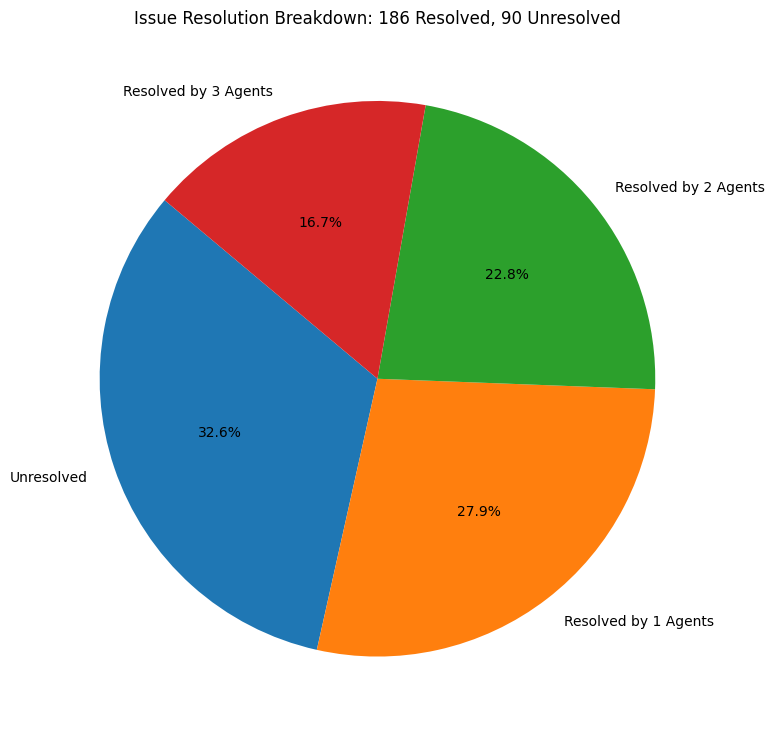

/tmp/ipython-input-2249845085.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


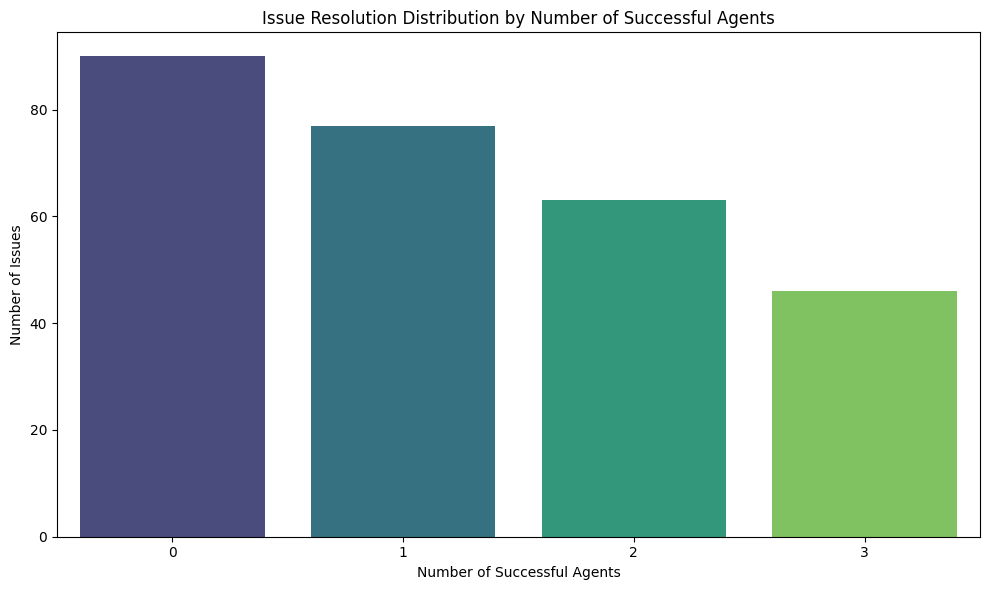

/tmp/ipython-input-2249845085.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


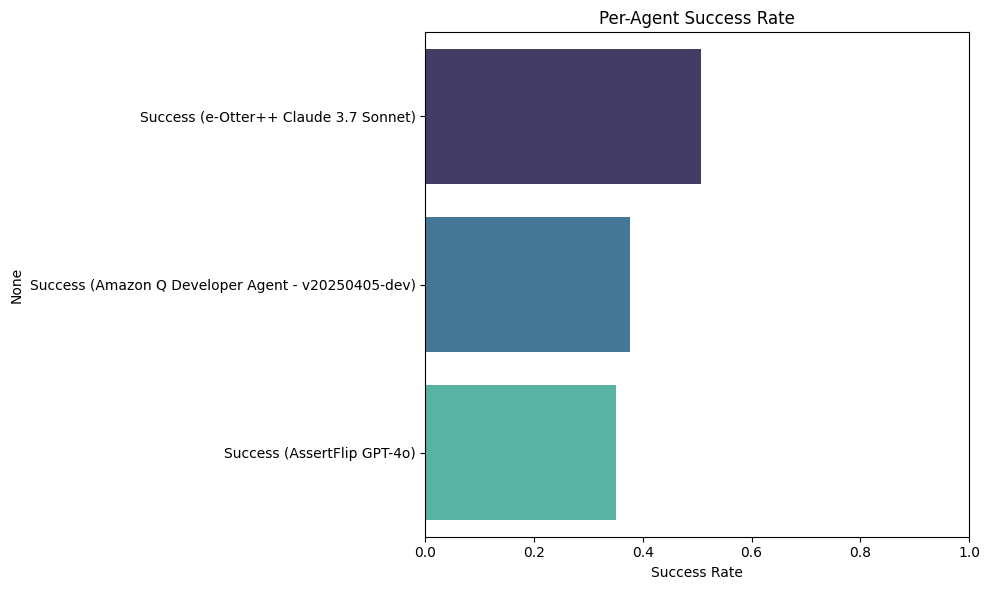

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# 1. Load Data
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12.xlsx"
sheet_name = "swt_bench_lite_modeling"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# 2. Extract Success Columns
# -----------------------------
success_cols = [col for col in df.columns if col.startswith("Success (")]

print("Agents detected:")
for col in success_cols:
    print(col)

# Convert True/False to 1/0
df[success_cols] = df[success_cols].astype(bool).astype(int)

# -----------------------------
# 3. Compute Resolution Metrics
# -----------------------------

# Number of agents that solved each issue
df["num_successful_agents"] = df[success_cols].sum(axis=1)

# Resolved if at least 1 agent succeeded
df["resolved"] = df["num_successful_agents"] > 0

total_issues = len(df)
resolved_count = df["resolved"].sum()
unresolved_count = total_issues - resolved_count

print(f"\nTotal Issues: {total_issues}")
print(f"Resolved: {resolved_count}")
print(f"Unresolved: {unresolved_count}")

# -----------------------------
# 4. Pie Chart (Similar to Paper)
# -----------------------------

breakdown_counts = df["num_successful_agents"].value_counts().sort_index()

labels = []
sizes = []

for k, v in breakdown_counts.items():
    if k == 0:
        labels.append("Unresolved")
    else:
        labels.append(f"Resolved by {k} Agents")
    sizes.append(v)

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140
)
plt.title(f"Issue Resolution Breakdown: {resolved_count} Resolved, {unresolved_count} Unresolved")
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Better Visualization (Recommended)
# -----------------------------

plt.figure(figsize=(10, 6))

sns.barplot(
    x=breakdown_counts.index,
    y=breakdown_counts.values,
    palette="viridis"
)

plt.xlabel("Number of Successful Agents")
plt.ylabel("Number of Issues")
plt.title("Issue Resolution Distribution by Number of Successful Agents")
plt.xticks(ticks=np.arange(len(breakdown_counts.index)),
           labels=breakdown_counts.index)

plt.tight_layout()
plt.show()

# -----------------------------
# 6. Optional: Per-Agent Success Rate
# -----------------------------

agent_success_rates = df[success_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=agent_success_rates.values,
    y=agent_success_rates.index,
    palette="mako"
)

plt.xlabel("Success Rate")
plt.title("Per-Agent Success Rate")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


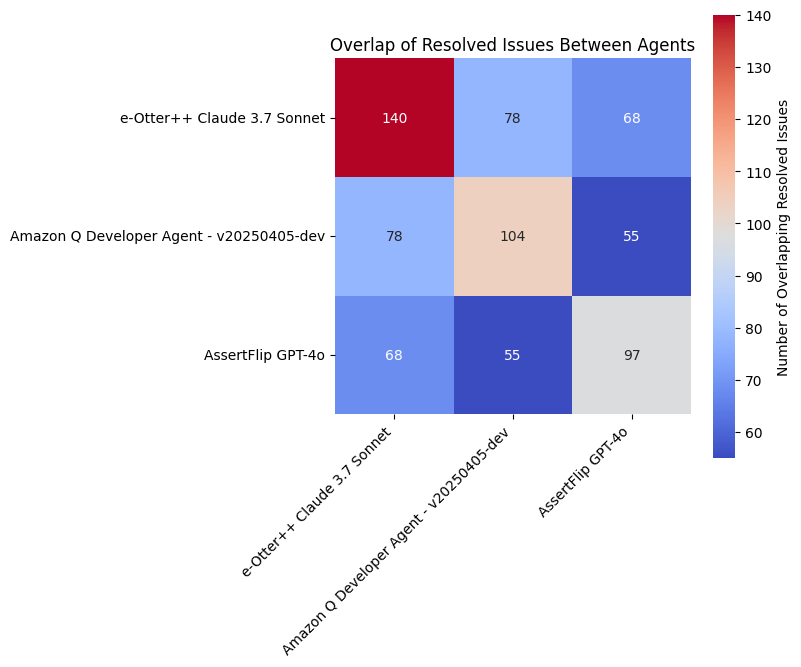

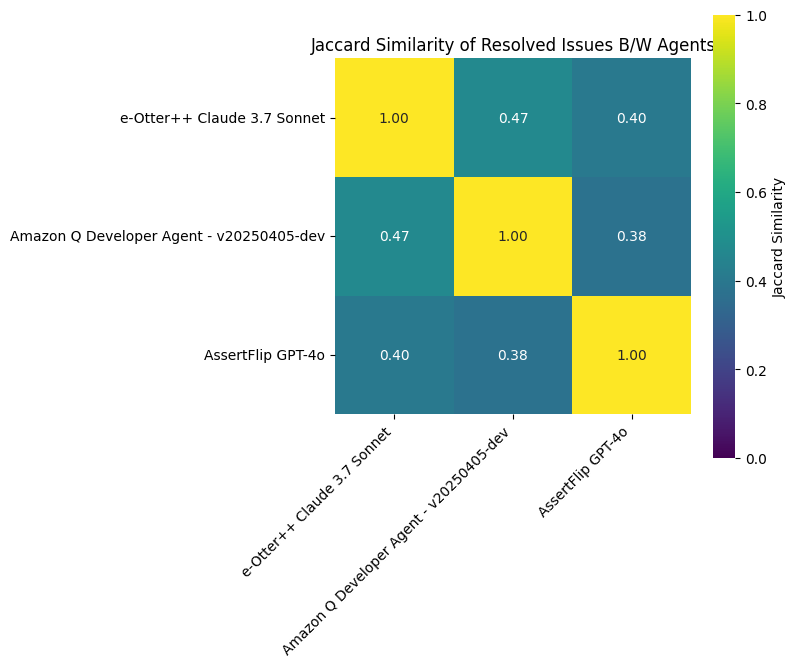

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load Data
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12.xlsx"
sheet_name = "swt_bench_lite_modeling"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# 2. Define Desired Agent Order
# -----------------------------
desired_order = [
    # "Logic Star AI",
    "e-Otter++ Claude 3.7 Sonnet",
    # "OpenHands GPT-5-mini",
    "Amazon Q Developer Agent - v20250405-dev", #"Amazon Q Developer Agent v20250405-dev",
    "AssertFlip GPT-4o",
    # "OpenHands-Claude-Sonnet-3.5"
]

# Map full column names
success_cols = [f"Success ({agent})" for agent in desired_order]

# Verify columns exist
missing = [col for col in success_cols if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns in Excel file: {missing}")

# Convert True/False to 1/0
df[success_cols] = df[success_cols].astype(bool).astype(int)

success_matrix = df[success_cols].values

# -----------------------------
# 3. Compute Pairwise Overlap
# -----------------------------
overlap_matrix = np.dot(success_matrix.T, success_matrix)

overlap_df = pd.DataFrame(
    overlap_matrix,
    index=desired_order,
    columns=desired_order
)

# -----------------------------
# 4. Plot Raw Overlap Heatmap
# -----------------------------
plt.figure(figsize=(8, 7))

sns.heatmap(
    overlap_df,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    square=True,
    cbar_kws={"label": "Number of Overlapping Resolved Issues"}
)

plt.title("Overlap of Resolved Issues Between Agents")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# -----------------------------
# 5. Compute Jaccard Similarity
# -----------------------------
jaccard_matrix = np.zeros_like(overlap_matrix, dtype=float)

for i in range(len(success_cols)):
    for j in range(len(success_cols)):
        intersection = overlap_matrix[i, j]
        union = (
            success_matrix[:, i].sum()
            + success_matrix[:, j].sum()
            - intersection
        )
        if union == 0:
            jaccard_matrix[i, j] = 0
        else:
            jaccard_matrix[i, j] = intersection / union

jaccard_df = pd.DataFrame(
    jaccard_matrix,
    index=desired_order,
    columns=desired_order
)

# -----------------------------
# 6. Plot Jaccard Heatmap
# -----------------------------
plt.figure(figsize=(8, 7))

sns.heatmap(
    jaccard_df,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    square=True,
    vmin=0,
    vmax=1,
    cbar_kws={"label": "Jaccard Similarity"}
)

plt.title("Jaccard Similarity of Resolved Issues B/W Agents")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


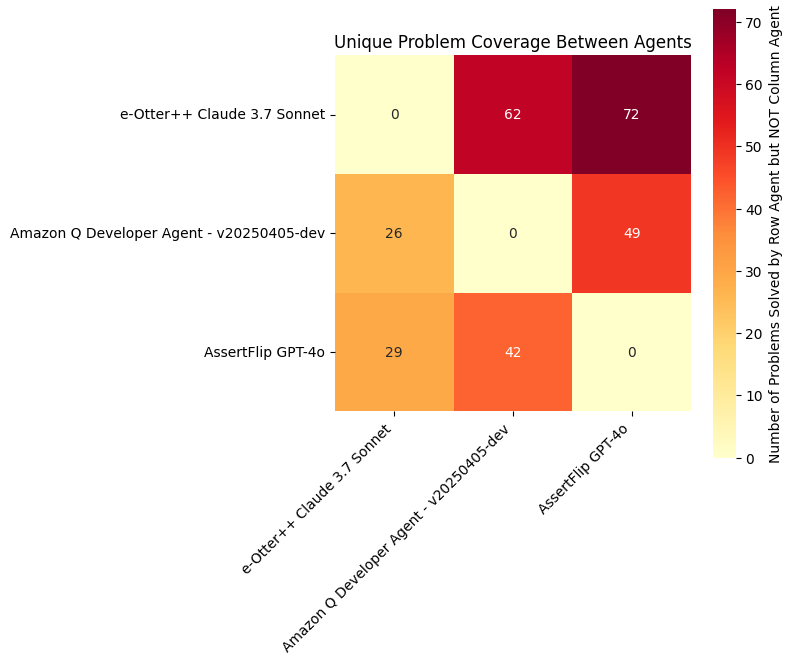

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load Data
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12.xlsx"
sheet_name = "swt_bench_lite_modeling"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# 2. Agent Order
# -----------------------------
# agents = [
#     "Logic Star AI",
#     "e-Otter++ Claude 3.7 Sonnet",
#     "OpenHands GPT-5-mini",
#     "Amazon Q Developer Agent v20250405-dev",
#     "AssertFlip GPT-4o",
#     "OpenHands-Claude-Sonnet-3.5"
# ]
agents = [
    # "Logic Star AI",
    "e-Otter++ Claude 3.7 Sonnet",
    # "OpenHands GPT-5-mini",
    "Amazon Q Developer Agent - v20250405-dev", #"Amazon Q Developer Agent v20250405-dev",
    "AssertFlip GPT-4o",
    # "OpenHands-Claude-Sonnet-3.5"
]

success_cols = [f"Success ({a})" for a in agents]
df[success_cols] = df[success_cols].astype(bool).astype(int)

X = df[success_cols].values

# -----------------------------
# 3. Compute Unique Coverage
# -----------------------------
n = len(agents)
unique_matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(n):
        if i != j:
            unique_matrix[i, j] = np.sum((X[:, i] == 1) & (X[:, j] == 0))
        else:
            unique_matrix[i, j] = 0

unique_df = pd.DataFrame(unique_matrix, index=agents, columns=agents)

# -----------------------------
# 4. Plot Heatmap
# -----------------------------
plt.figure(figsize=(8, 7))

sns.heatmap(
    unique_df,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    square=True,
    cbar_kws={"label": "Number of Problems Solved by Row Agent but NOT Column Agent"}
)

plt.title("Unique Problem Coverage Between Agents")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()



Total problems solved by at least one model (ensemble): 186

Number of problems solved by others but NOT by given model:
e-Otter++ Claude 3.7 Sonnet                 46
Amazon Q Developer Agent - v20250405-dev    82
AssertFlip GPT-4o                           89
dtype: int64

Fraction of ensemble coverage missed by each model:
e-Otter++ Claude 3.7 Sonnet                 0.247312
Amazon Q Developer Agent - v20250405-dev    0.440860
AssertFlip GPT-4o                           0.478495
dtype: float64


/tmp/ipython-input-1149259767.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


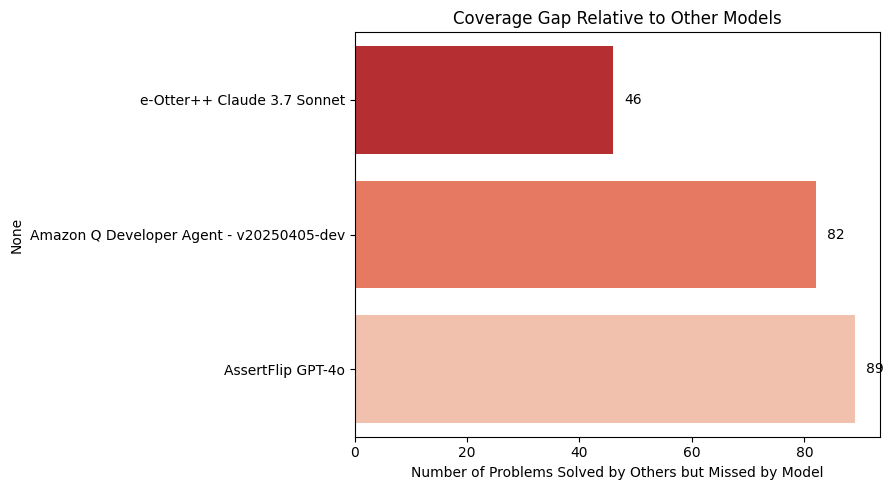

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load Data
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12.xlsx"
sheet_name = "swt_bench_lite_modeling"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# 2. Agent Order
# -----------------------------
# agents = [
#     "Logic Star AI",
#     "e-Otter++ Claude 3.7 Sonnet",
#     "OpenHands GPT-5-mini",
#     "Amazon Q Developer Agent v20250405-dev",
#     "AssertFlip GPT-4o",
#     "OpenHands-Claude-Sonnet-3.5"
# ]
agents = [
    # "Logic Star AI",
    "e-Otter++ Claude 3.7 Sonnet",
    # "OpenHands GPT-5-mini",
    "Amazon Q Developer Agent - v20250405-dev", #"Amazon Q Developer Agent v20250405-dev",
    "AssertFlip GPT-4o",
    # "OpenHands-Claude-Sonnet-3.5"
]

success_cols = [f"Success ({a})" for a in agents]
df[success_cols] = df[success_cols].astype(bool).astype(int)

X = df[success_cols].values

# -----------------------------
# 3. Ensemble Coverage
# -----------------------------
ensemble_solved = np.any(X == 1, axis=1)
total_ensemble = ensemble_solved.sum()

print(f"\nTotal problems solved by at least one model (ensemble): {total_ensemble}")

# -----------------------------
# 4. Compute Missed Problems Per Model
# -----------------------------
missed_counts = {}

for i, agent in enumerate(agents):
    solved_by_agent = X[:, i] == 1

    solved_by_others = np.any(np.delete(X, i, axis=1) == 1, axis=1)

    missed = np.sum((solved_by_others == True) & (solved_by_agent == False))

    missed_counts[agent] = missed

missed_series = pd.Series(missed_counts)

print("\nNumber of problems solved by others but NOT by given model:")
print(missed_series)

# -----------------------------
# 5. Percentage Missed Relative to Ensemble
# -----------------------------
missed_percentage = missed_series / total_ensemble

print("\nFraction of ensemble coverage missed by each model:")
print(missed_percentage)

# -----------------------------
# 6. Visualization
# -----------------------------
plt.figure(figsize=(9, 5))

bars = sns.barplot(
    x=missed_series.values,
    y=missed_series.index,
    palette="Reds_r"
)

plt.xlabel("Number of Problems Solved by Others but Missed by Model")
plt.title("Coverage Gap Relative to Other Models")

# -----------------------------
# Add number labels in front of each bar
# -----------------------------
for bar in bars.patches:
    width = bar.get_width()
    plt.text(
        width + 2,  # small offset from end of bar
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va='center'
    )

plt.tight_layout()
plt.show()


RQ4

In [ ]:
import pandas as pd
import os

# -----------------------------
# File info
# -----------------------------
file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12.xlsx"
sheet_name = "swt_bench_lite_modeling"

# -----------------------------
# Load sheet
# -----------------------------
df = pd.read_excel(file_path, sheet_name=sheet_name)

# -----------------------------
# Normalize values
# -----------------------------
def normalize_cell(x):
    # Handle real booleans first
    if isinstance(x, bool):
        return int(x)

    # Handle strings
    if isinstance(x, str):
        x_clean = x.strip().lower()
        if x_clean in ["yes", "true"]:
            return 1
        elif x_clean in ["no", "false"]:
            return 0

    return x  # leave everything else unchanged

df = df.applymap(normalize_cell)

# -----------------------------
# Save new file
# -----------------------------
base, ext = os.path.splitext(file_path)
new_file_path = f"{base}_normalized{ext}"

df.to_excel(new_file_path, sheet_name=sheet_name, index=False)

print("Normalization complete.")
print(f"Saved to: {new_file_path}")


/tmp/ipython-input-668441014.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(normalize_cell)


Normalization complete.
Saved to: /content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12_normalized.xlsx


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# ==========================
# 1. Load Data
# ==========================

file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12.xlsx"
sheet_name = "swt_bench_verified_modeling"

df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = df.columns.str.strip()

# ==========================
# 2. Helper Function
# ==========================

def to_binary(series):
    return (
        series
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({
            "true": 1,
            "false": 0,
            "1": 1,
            "0": 0
        })
    )

# ==========================
# 3. Feature Setup
# ==========================

features = [
    "contains_code_snippets",
    "number_of_code_blocks",
    "code_lines",
    "code_to_text_ratio"
]

df["contains_code_snippets"] = to_binary(df["contains_code_snippets"])

for col in ["number_of_code_blocks", "code_lines", "code_to_text_ratio"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

success_cols = [col for col in df.columns if col.lower().startswith("success")]

for col in success_cols:
    df[col] = to_binary(df[col])

# ==========================
# 4. Clean Dataset
# ==========================

model_cols = features + success_cols
df_model = df[model_cols].copy()
df_model = df_model.apply(pd.to_numeric, errors="coerce")
df_model = df_model.dropna()

if len(df_model) == 0:
    raise ValueError("All rows were dropped during cleaning.")

# ==========================
# 5. Modeling Per Agent (Full Dataset)
# ==========================

for target in success_cols:

    print("\n==============================")
    print(f"Agent: {target}")
    print("==============================")

    if df_model[target].nunique() < 2:
        print("Skipping — only one class present.")
        continue

    X = df_model[features]
    y = df_model[target]

    # ==========================
    # Logistic Regression on full data
    # ==========================

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_scaled, y)

    odds_ratios = np.exp(logreg.coef_[0])

    odds_df = pd.DataFrame({
        "Feature": features,
        "Coefficient": logreg.coef_[0],
        "Odds_Ratio": odds_ratios
    }).sort_values(by="Odds_Ratio", ascending=False)

    odds_df = odds_df.round(4)

    print("\n--- Logistic Regression (Odds Ratios) ---")
    for _, row in odds_df.iterrows():
        row_str = " ".join(str(row[col]) for col in odds_df.columns)
        print(f'=TEXTSPLIT("{row_str}", " ")')

    # ==========================
    # Random Forest on full data
    # ==========================

    rf = RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X, y)

    # ---- Mean Decrease in Impurity ----
    mdi_df = pd.DataFrame({
        "Feature": features,
        "MDI_Importance": rf.feature_importances_
    }).sort_values(by="MDI_Importance", ascending=False)

    mdi_df = mdi_df.round(4)

    print("\n--- Random Forest (Mean Decrease in Impurity) ---")
    for _, row in mdi_df.iterrows():
        row_str = " ".join(str(row[col]) for col in mdi_df.columns)
        print(f'=TEXTSPLIT("{row_str}", " ")')

    # ---- Permutation Importance (Accuracy on full dataset) ----
    perm = permutation_importance(
        rf,
        X,
        y,
        n_repeats=30,
        random_state=42,
        scoring="accuracy",
        n_jobs=-1
    )

    perm_df = pd.DataFrame({
        "Feature": features,
        "Perm_Mean_Acc_Decrease": perm.importances_mean,
        # "Perm_STD": perm.importances_std
    }).sort_values(by="Perm_Mean_Acc_Decrease", ascending=False)

    perm_df = perm_df.round(4)

    print("\n--- Random Forest (Permutation Importance: Accuracy decrease) ---")
    for _, row in perm_df.iterrows():
        row_str = " ".join(str(row[col]) for col in perm_df.columns)
        print(f'=TEXTSPLIT("{row_str}", " ")')


/tmp/ipython-input-2081391498.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-2081391498.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-2081391498.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-208


Agent: Success (Amazon Q Developer Agent v20250405-dev)

--- Logistic Regression (Odds Ratios) ---
=TEXTSPLIT("number_of_code_blocks 0.1559 1.1687", " ")
=TEXTSPLIT("code_to_text_ratio 0.1542 1.1667", " ")
=TEXTSPLIT("contains_code_snippets -0.1048 0.9005", " ")
=TEXTSPLIT("code_lines -0.1291 0.8789", " ")

--- Random Forest (Mean Decrease in Impurity) ---
=TEXTSPLIT("code_to_text_ratio 0.4785", " ")
=TEXTSPLIT("code_lines 0.3865", " ")
=TEXTSPLIT("number_of_code_blocks 0.1308", " ")
=TEXTSPLIT("contains_code_snippets 0.0042", " ")

--- Random Forest (Permutation Importance: Accuracy decrease) ---
=TEXTSPLIT("code_to_text_ratio 0.157", " ")
=TEXTSPLIT("code_lines 0.1509", " ")
=TEXTSPLIT("number_of_code_blocks 0.0876", " ")
=TEXTSPLIT("contains_code_snippets 0.0127", " ")

Agent: Success (AssertFlip GPT-4o)

--- Logistic Regression (Odds Ratios) ---
=TEXTSPLIT("code_to_text_ratio 0.2448 1.2773", " ")
=TEXTSPLIT("number_of_code_blocks 0.1757 1.1921", " ")
=TEXTSPLIT("contains_code_snip

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# ==========================
# 1. Load Data
# ==========================

file_path = "/content/drive/MyDrive/MMath CS/Winter 2026/swt_bench_issue_classification_feb12.xlsx"
sheet_name = "swt_bench_lite_modeling"

df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = df.columns.str.strip()

# ==========================
# 2. Helper Function
# ==========================

def to_binary(series):
    return (
        series
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({
            "true": 1,
            "false": 0,
            "1": 1,
            "0": 0
        })
    )

# ==========================
# 3. Feature Setup
# ==========================

features = [
    "flesch_reading_ease",
    "flesch_kincaid_grade",
    "sentence_count",
    "word_count"
]

for col in features:
    df[col] = pd.to_numeric(df[col], errors="coerce")

success_cols = [col for col in df.columns if col.lower().startswith("success")]

for col in success_cols:
    df[col] = to_binary(df[col])

# ==========================
# 4. Clean Dataset
# ==========================

model_cols = features + success_cols
df_model = df[model_cols].copy()
df_model = df_model.apply(pd.to_numeric, errors="coerce")
df_model = df_model.dropna()

if len(df_model) == 0:
    raise ValueError("All rows were dropped during cleaning.")

# ==========================
# 5. Modeling Per Agent (Full Dataset)
# ==========================

for target in success_cols:

    print("\n==============================")
    print(f"Agent: {target}")
    print("==============================")

    if df_model[target].nunique() < 2:
        print("Skipping — only one class present.")
        continue

    X = df_model[features]
    y = df_model[target]

    # ==========================
    # Logistic Regression on full data
    # ==========================

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_scaled, y)

    odds_ratios = np.exp(logreg.coef_[0])

    odds_df = pd.DataFrame({
        "Feature": features,
        "Coefficient": logreg.coef_[0],
        "Odds_Ratio": odds_ratios
    }).sort_values(by="Odds_Ratio", ascending=False)

    odds_df = odds_df.round(4)

    print("\n--- Logistic Regression (Odds Ratios) ---")
    for _, row in odds_df.iterrows():
        row_str = " ".join(str(row[col]) for col in odds_df.columns)
        print(f'=TEXTSPLIT("{row_str}", " ")')

    # ==========================
    # Random Forest on full data
    # ==========================

    rf = RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X, y)

    # ---- Mean Decrease in Impurity ----
    mdi_df = pd.DataFrame({
        "Feature": features,
        "MDI_Importance": rf.feature_importances_
    }).sort_values(by="MDI_Importance", ascending=False)

    mdi_df = mdi_df.round(4)

    print("\n--- Random Forest (Mean Decrease in Impurity) ---")
    for _, row in mdi_df.iterrows():
        row_str = " ".join(str(row[col]) for col in mdi_df.columns)
        print(f'=TEXTSPLIT("{row_str}", " ")')

    # ---- Permutation Importance (Accuracy on full dataset) ----
    perm = permutation_importance(
        rf,
        X,
        y,
        n_repeats=30,
        random_state=42,
        scoring="accuracy",
        n_jobs=-1
    )

    perm_df = pd.DataFrame({
        "Feature": features,
        "Perm_Mean_Acc_Decrease": perm.importances_mean
    }).sort_values(by="Perm_Mean_Acc_Decrease", ascending=False)

    perm_df = perm_df.round(4)

    print("\n--- Random Forest (Permutation Importance: Accuracy decrease) ---")
    for _, row in perm_df.iterrows():
        row_str = " ".join(str(row[col]) for col in perm_df.columns)
        print(f'=TEXTSPLIT("{row_str}", " ")')


/tmp/ipython-input-1011072717.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-1011072717.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-1011072717.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({



Agent: Success (Amazon Q Developer Agent - v20250405-dev)

--- Logistic Regression (Odds Ratios) ---
=TEXTSPLIT("word_count 0.1358 1.1455", " ")
=TEXTSPLIT("flesch_kincaid_grade -0.138 0.8711", " ")
=TEXTSPLIT("flesch_reading_ease -0.273 0.7611", " ")
=TEXTSPLIT("sentence_count -0.5061 0.6028", " ")

--- Random Forest (Mean Decrease in Impurity) ---
=TEXTSPLIT("word_count 0.2778", " ")
=TEXTSPLIT("flesch_reading_ease 0.2659", " ")
=TEXTSPLIT("flesch_kincaid_grade 0.2345", " ")
=TEXTSPLIT("sentence_count 0.2218", " ")

--- Random Forest (Permutation Importance: Accuracy decrease) ---
=TEXTSPLIT("word_count 0.2147", " ")
=TEXTSPLIT("flesch_reading_ease 0.1586", " ")
=TEXTSPLIT("sentence_count 0.1413", " ")
=TEXTSPLIT("flesch_kincaid_grade 0.1091", " ")

Agent: Success (AssertFlip GPT-4o)

--- Logistic Regression (Odds Ratios) ---
=TEXTSPLIT("flesch_reading_ease 0.0874 1.0914", " ")
=TEXTSPLIT("flesch_kincaid_grade 0.0665 1.0687", " ")
=TEXTSPLIT("word_count 0.0288 1.0292", " ")
=TEXTSPL